Двумерная сверточная нейронная сеть

Двумерная свертка (2D convolution) — это довольно простая операция: начинаем с ядра, представляющего из себя матрицу весов (weight matrix). Ядро “скользит” над двумерным изображением, поэлементно выполняя операцию умножения с той частью входных данных, над которой оно сейчас находится, и затем суммирует все полученные значения в один выходной пиксель.

Ядро повторяет эту процедуру с каждой локацией, над которой оно “скользит”, преобразуя двумерную матрицу в другую все еще двумерную матрицу признаков. Признаки на выходе являются взвешенными суммами (где веса являются значениями самого ядра) признаков на входе, расположенных примерно в том же месте, что и выходной пиксель на входном слое.

Независимо от того, попадает ли входной признак в “примерно то же место”, он определяется в зависимости от того, находится он в зоне ядра, создающего выходные данные, или нет. Это значит, что размер ядра сверточной нейронной сети определяет количество признаков, которые будут объединены для получения нового признака на выходе.

Более подробно см. (https://neurohive.io/ru/osnovy-data-science/glubokaya-svertochnaja-nejronnaja-set/)

Mounted at /content/drive
[[510. 510. 510. ... 510. 510. 510.]
 [510. 510. 510. ... 510. 510. 510.]
 [510. 510. 510. ... 510. 510. 510.]
 ...
 [510. 510. 510. ... 510. 510. 510.]
 [510. 510. 510. ... 510. 510. 510.]
 [510. 510. 510. ... 510. 510. 510.]]


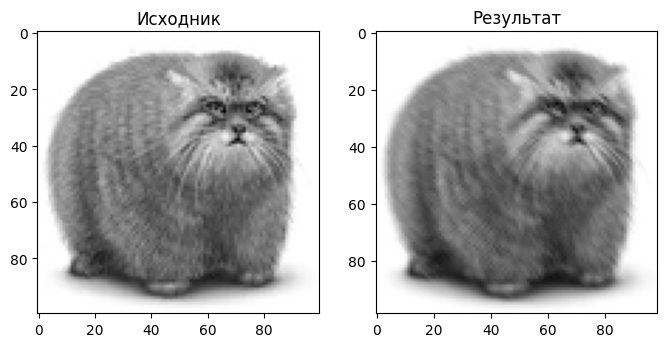

In [1]:
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')
img_path = '/content/drive/MyDrive/cat.png'

image_raw = tf.io.read_file(img_path)
image_tf = tf.io.decode_image(image_raw)
image_tf = tf.image.rgb_to_grayscale(image_tf)

image_tf = tf.expand_dims(image_tf, axis=0)
image_tf = tf.cast(image_tf, tf.float32)

filter_tf = tf.constant([[[[1]], [[0]]], [[[0]], [[1]]]], dtype=tf.float32)

output_tf = tf.nn.conv2d(input=image_tf, filters=filter_tf, strides=[1, 1, 1, 1], padding='VALID')

print(output_tf.numpy().squeeze())

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image_tf.numpy().squeeze(), cmap='gray')
plt.title('Исходник')

plt.subplot(1, 2, 2)
plt.imshow(output_tf.numpy().squeeze(), cmap='gray')
plt.title('Результат')

plt.show()